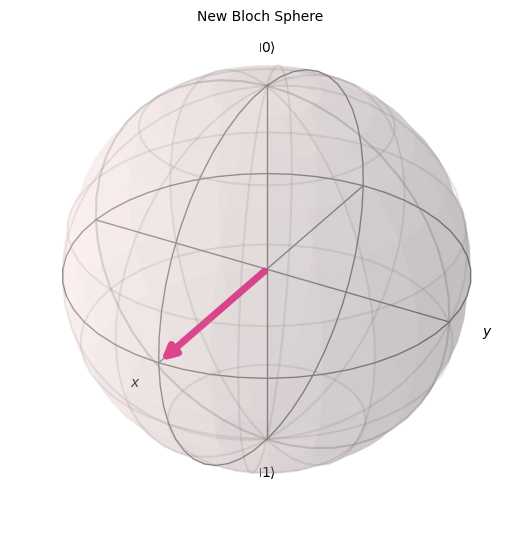

In [4]:
from qiskit.visualization import plot_bloch_vector
 
plot_bloch_vector([1,0,0], title="New Bloch Sphere")

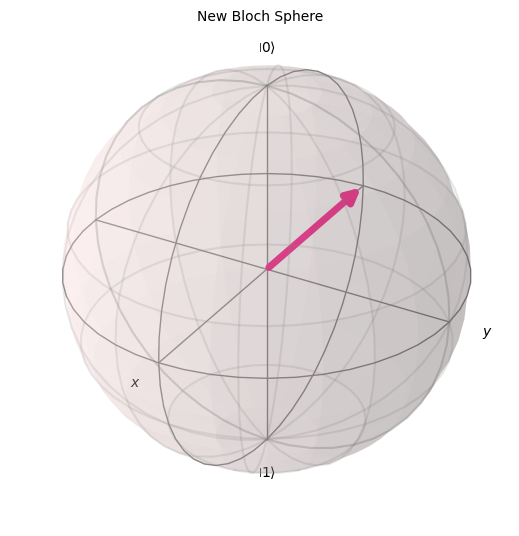

In [28]:
from qiskit.visualization import plot_bloch_vector
import math
 
plot_bloch_vector([1,math.pi/2,math.pi], coord_type='spherical', title="New Bloch Sphere")

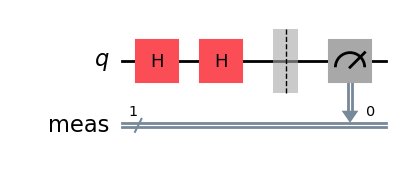

In [1]:
# from qiskit import QuantumCircuit
# from qiskit.quantum_info import SparsePauliOp
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
# qc = QuantumCircuit(2)
 
# Create a simple circuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.h(0)
circuit.measure_all()
circuit.draw('mpl', style="iqp")




In [ ]:
api_token = '4d4f3ecb9f64f7cfaf92ebd2147e5fd5003898ec9bad7de768b7e7d62e41837046353c54ed294a60cd848f45908ab14f4e93bf9acfaec00f1c4fc0744052c879'
# If you did not previously save your credentials, use the following line instead:
service = QiskitRuntimeService(channel="ibm_quantum", token=api_token)
# service = QiskitRuntimeService()
 
# Use the following code instead if you want to run on a simulator:
#from qiskit_ibm_runtime.fake_provider import FakeCairoV2
#backend = FakeCairoV2()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#isa_circuit = pm.run(qc)
#isa_circuit.draw('mpl', idle_wires=False)

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

{'1': 5, '0': 1019}


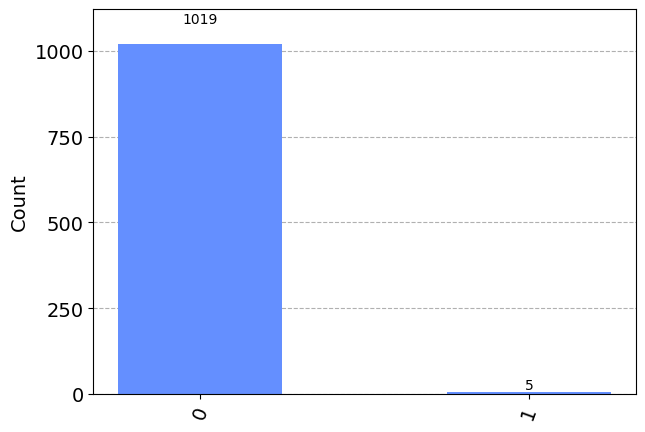

In [2]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeCairoV2
backend = FakeCairoV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

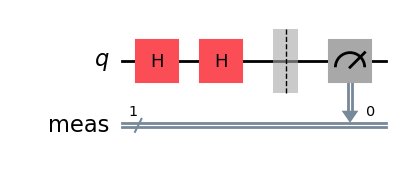

In [22]:
# from qiskit import QuantumCircuit
# from qiskit.quantum_info import SparsePauliOp
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
# qc = QuantumCircuit(2)
 
# Create a simple circuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.h(0)
circuit.measure_all()
circuit.draw('mpl', style="iqp")

In [ ]:
# from qiskit import QuantumCircuit
# from qiskit.quantum_info import SparsePauliOp
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram

import numpy as np
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
# qc = QuantumCircuit(2)
 
# Create a simple circuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.draw('mpl', style="iqp")

# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeCairoV2
backend = FakeCairoV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
result = job.result()
statevector = result.get_statevector()

# Get the Bloch vector coordinates
theta = 2 * np.arccos(statevector[0].real)
phi = np.angle(statevector[1])

# Plot the Bloch sphere
plot_bloch_vector([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])